In [1]:
#import important programs
import numpy as np
import pandas as pd
import sqlalchemy as sal
from sqlalchemy import create_engine
import pymysql
import pandas_profiling as pp

D:\Users\jryba\anaconda3\envs\DataAnalyticsCourse\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#data from sql didnt work, used downloaded file
data = pd.read_csv('credit.csv')
pd.set_option('display.max_columns',None)
data.head()

MyUnknownColumn         X1      X2          X3        X4   X5     X6     X7  \
0              ID  LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1               1      20000  female  university         1   24      2      2   
2               2     120000  female  university         2   26     -1      2   
3               3      90000  female  university         2   34      0      0   
4               4      50000  female  university         1   37      0      0   

      X8     X9    X10    X11        X12        X13        X14        X15  \
0  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4   
1     -1     -1     -2     -2       3913       3102        689          0   
2      0      0      0      2       2682       1725       2682       3272   
3      0      0      0      0      29239      14027      13559      14331   
4      0      0      0      0      46990      48233      49291      28314   

         X16        X17       X18       X19       X20       X21       X22  \
0  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5   
1          0          0         0       689         0         0         0   
2       3455       3261         0      1000      1000      1000         0   
3      14948      15549      1518      1500      1000      1000      1000   
4      28959      29547      2000      2019      1200      1100      1069   

        X23                           Y  
0  PAY_AMT6  default payment next month  
1         0                     default  
2      2000                     default  
3      5000                 not default  
4      1000                 not default

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30204 entries, 0 to 30203
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MyUnknownColumn  30203 non-null  object
 1   X1               30204 non-null  object
 2   X2               30204 non-null  object
 3   X3               30204 non-null  object
 4   X4               30204 non-null  object
 5   X5               30204 non-null  object
 6   X6               30204 non-null  object
 7   X7               30204 non-null  object
 8   X8               30204 non-null  object
 9   X9               30204 non-null  object
 10  X10              30204 non-null  object
 11  X11              30204 non-null  object
 12  X12              30204 non-null  object
 13  X13              30204 non-null  object
 14  X14              30204 non-null  object
 15  X15              30204 non-null  object
 16  X16              30204 non-null  object
 17  X17              30204 non-null

Row index 0 is what we want the columns to be named. Change column names to indexed names and delete index 0

In [4]:
data.columns = ['ID', 'Limit_bal', 'Gender', 'Education', 'Marriage', 'Age', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_Amt1', 'Bill_Amt2', 'Bill_Amt3', 'Bill_Amt4', 'Bill_Amt5', 'Bill_Amt6', 'Pay_Amt1', 'Pay_Amt2', 'Pay_Amt3', 'Pay_Amt4', 'Pay_Amt5', 'Pay_Amt6', 'Default']
data = data.drop(index=[0])
data = data.dropna()
data.head()

ID Limit_bal  Gender   Education Marriage Age Pay_1 Pay_2 Pay_3 Pay_4 Pay_5  \
1  1     20000  female  university        1  24     2     2    -1    -1    -2   
2  2    120000  female  university        2  26    -1     2     0     0     0   
3  3     90000  female  university        2  34     0     0     0     0     0   
4  4     50000  female  university        1  37     0     0     0     0     0   
5  5     50000    male  university        1  57    -1     0    -1     0     0   

  Pay_6 Bill_Amt1 Bill_Amt2 Bill_Amt3 Bill_Amt4 Bill_Amt5 Bill_Amt6 Pay_Amt1  \
1    -2      3913      3102       689         0         0         0        0   
2     2      2682      1725      2682      3272      3455      3261        0   
3     0     29239     14027     13559     14331     14948     15549     1518   
4     0     46990     48233     49291     28314     28959     29547     2000   
5     0      8617      5670     35835     20940     19146     19131     2000   

  Pay_Amt2 Pay_Amt3 Pay_Amt4 Pay_Amt5 Pay_Amt6      Default  
1      689        0        0        0        0      default  
2     1000     1000     1000        0     2000      default  
3     1500     1000     1000     1000     5000  not default  
4     2019     1200     1100     1069     1000  not default  
5    36681    10000     9000      689      679  not default

In [5]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Seems to be one more index with each column name. Is there one null entry as well?

In [6]:
#checking for null entries
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30202 entries, 1 to 30203
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30202 non-null  object
 1   Limit_bal  30202 non-null  object
 2   Gender     30202 non-null  object
 3   Education  30202 non-null  object
 4   Marriage   30202 non-null  object
 5   Age        30202 non-null  object
 6   Pay_1      30202 non-null  object
 7   Pay_2      30202 non-null  object
 8   Pay_3      30202 non-null  object
 9   Pay_4      30202 non-null  object
 10  Pay_5      30202 non-null  object
 11  Pay_6      30202 non-null  object
 12  Bill_Amt1  30202 non-null  object
 13  Bill_Amt2  30202 non-null  object
 14  Bill_Amt3  30202 non-null  object
 15  Bill_Amt4  30202 non-null  object
 16  Bill_Amt5  30202 non-null  object
 17  Bill_Amt6  30202 non-null  object
 18  Pay_Amt1   30202 non-null  object
 19  Pay_Amt2   30202 non-null  object
 20  Pay_Amt3   30202 non-null  o

30202 entries, 30202 non-null in each column - no null entries

In [7]:
#Finding index with entries preventing object type change to integer
#Choose integer column (ID), change to string. 
data['ID'] = data['ID'].astype('string')
#Look for entries where string entries are not digits. Create new boolean column, digit entries are true, non-digit are false
data['ID2'] = data['ID'].str.isdigit()
#Locate entries in new column that are false
data.loc[data['ID2'] == False]

ID  Limit_bal Gender  Education  Marriage  Age  Pay_1  Pay_2  Pay_3  \
203  ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   

     Pay_4  Pay_5  Pay_6  Bill_Amt1  Bill_Amt2  Bill_Amt3  Bill_Amt4  \
203  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4   

     Bill_Amt5  Bill_Amt6  Pay_Amt1  Pay_Amt2  Pay_Amt3  Pay_Amt4  Pay_Amt5  \
203  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5   

     Pay_Amt6                     Default    ID2  
203  PAY_AMT6  default payment next month  False

In [8]:
#print index found to have non-integer entries (I know it's a duplicate, just for me to remember how to print specific indexes) 
print(data.loc[[203]])

     ID  Limit_bal Gender  Education  Marriage  Age  Pay_1  Pay_2  Pay_3  \
203  ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   

     Pay_4  Pay_5  Pay_6  Bill_Amt1  Bill_Amt2  Bill_Amt3  Bill_Amt4  \
203  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4   

     Bill_Amt5  Bill_Amt6  Pay_Amt1  Pay_Amt2  Pay_Amt3  Pay_Amt4  Pay_Amt5  \
203  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5   

     Pay_Amt6                     Default    ID2  
203  PAY_AMT6  default payment next month  False  


Entry 203 seems to be duplicate of column names, can be deleted

In [9]:
#deleting entry 203
data = data.drop(index=203)

In [10]:
#referencing column names to change data type
data.head()

ID Limit_bal  Gender   Education Marriage Age Pay_1 Pay_2 Pay_3 Pay_4 Pay_5  \
1  1     20000  female  university        1  24     2     2    -1    -1    -2   
2  2    120000  female  university        2  26    -1     2     0     0     0   
3  3     90000  female  university        2  34     0     0     0     0     0   
4  4     50000  female  university        1  37     0     0     0     0     0   
5  5     50000    male  university        1  57    -1     0    -1     0     0   

  Pay_6 Bill_Amt1 Bill_Amt2 Bill_Amt3 Bill_Amt4 Bill_Amt5 Bill_Amt6 Pay_Amt1  \
1    -2      3913      3102       689         0         0         0        0   
2     2      2682      1725      2682      3272      3455      3261        0   
3     0     29239     14027     13559     14331     14948     15549     1518   
4     0     46990     48233     49291     28314     28959     29547     2000   
5     0      8617      5670     35835     20940     19146     19131     2000   

  Pay_Amt2 Pay_Amt3 Pay_Amt4 Pay_Amt5 Pay_Amt6      Default   ID2  
1      689        0        0        0        0      default  True  
2     1000     1000     1000        0     2000      default  True  
3     1500     1000     1000     1000     5000  not default  True  
4     2019     1200     1100     1069     1000  not default  True  
5    36681    10000     9000      689      679  not default  True

In [11]:
#changing data types in columns with integer entries
data['ID']=data['ID'].astype('int')
data['Marriage']=data['Marriage'].astype('int')
data['Limit_bal']=data['Limit_bal'].astype('int')
data['Age']=data['Age'].astype('int')
data['Pay_1']=data['Pay_1'].astype('int')
data['Pay_2']=data['Pay_2'].astype('int')
data['Pay_3']=data['Pay_3'].astype('int')
data['Pay_4']=data['Pay_4'].astype('int')
data['Pay_5']=data['Pay_5'].astype('int')
data['Pay_6']=data['Pay_6'].astype('int')
data['Bill_Amt1']=data['Bill_Amt1'].astype('int')
data['Bill_Amt2']=data['Bill_Amt2'].astype('int')
data['Bill_Amt3']=data['Bill_Amt3'].astype('int')
data['Bill_Amt4']=data['Bill_Amt4'].astype('int')
data['Bill_Amt5']=data['Bill_Amt5'].astype('int')
data['Bill_Amt6']=data['Bill_Amt6'].astype('int')
data['Pay_Amt1']=data['Pay_Amt1'].astype('int')
data['Pay_Amt2']=data['Pay_Amt2'].astype('int')
data['Pay_Amt3']=data['Pay_Amt3'].astype('int')
data['Pay_Amt4']=data['Pay_Amt4'].astype('int')
data['Pay_Amt5']=data['Pay_Amt5'].astype('int')
data['Pay_Amt6']=data['Pay_Amt6'].astype('int')
data = data.drop(columns = 'ID2')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 1 to 30203
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30201 non-null  int32 
 1   Limit_bal  30201 non-null  int32 
 2   Gender     30201 non-null  object
 3   Education  30201 non-null  object
 4   Marriage   30201 non-null  int32 
 5   Age        30201 non-null  int32 
 6   Pay_1      30201 non-null  int32 
 7   Pay_2      30201 non-null  int32 
 8   Pay_3      30201 non-null  int32 
 9   Pay_4      30201 non-null  int32 
 10  Pay_5      30201 non-null  int32 
 11  Pay_6      30201 non-null  int32 
 12  Bill_Amt1  30201 non-null  int32 
 13  Bill_Amt2  30201 non-null  int32 
 14  Bill_Amt3  30201 non-null  int32 
 15  Bill_Amt4  30201 non-null  int32 
 16  Bill_Amt5  30201 non-null  int32 
 17  Bill_Amt6  30201 non-null  int32 
 18  Pay_Amt1   30201 non-null  int32 
 19  Pay_Amt2   30201 non-null  int32 
 20  Pay_Amt3   30201 non-null  i

In [12]:
#Changing non-integer entries to integers and changing data types to integer
data['Gender']=data['Gender'].replace('female','1')
data['Gender']=data['Gender'].replace('male','2')
data['Gender']=data['Gender'].astype('int')
data['Education']=data['Education'].replace('other','1')
data['Education']=data['Education'].replace('high school','2')
data['Education']=data['Education'].replace('university','3')
data['Education']=data['Education'].replace('graduate school','4')
data['Education']=data['Education'].astype('int')
data['Default']=data['Default'].replace('not default','1')
data['Default']=data['Default'].replace('default','2')
data['Default']=data['Default'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 1 to 30203
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30201 non-null  int32
 1   Limit_bal  30201 non-null  int32
 2   Gender     30201 non-null  int32
 3   Education  30201 non-null  int32
 4   Marriage   30201 non-null  int32
 5   Age        30201 non-null  int32
 6   Pay_1      30201 non-null  int32
 7   Pay_2      30201 non-null  int32
 8   Pay_3      30201 non-null  int32
 9   Pay_4      30201 non-null  int32
 10  Pay_5      30201 non-null  int32
 11  Pay_6      30201 non-null  int32
 12  Bill_Amt1  30201 non-null  int32
 13  Bill_Amt2  30201 non-null  int32
 14  Bill_Amt3  30201 non-null  int32
 15  Bill_Amt4  30201 non-null  int32
 16  Bill_Amt5  30201 non-null  int32
 17  Bill_Amt6  30201 non-null  int32
 18  Pay_Amt1   30201 non-null  int32
 19  Pay_Amt2   30201 non-null  int32
 20  Pay_Amt3   30201 non-null  int32
 21  Pay_Amt4   3

All columns are now integer types. Noting non-integer column integer equivalents

Gender: female = 1, male = 2

Education: other = 1, high school = 2, university = 3, graduate school = 4

Default: not default = 1, default = 2

The company wants to know how much balance to give future creditors, or at the very least, determine who will likely default and who likely won't. The dependent variables, then, would be the limit balance (limit_bal) and default columns. Everything else would be independent.

In [14]:
#import graphing packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Creating and graphing correlation matrix
corr_mat = data.corr()
corr_mat.style.background_gradient(cmap='rocket')

Limit Balance seems to have a positive correlation with education, age, bill amount and pay amount, and a negative correlation with pay and default

Default seems to have a positive correlation with pay and a negative correlation with limit balance

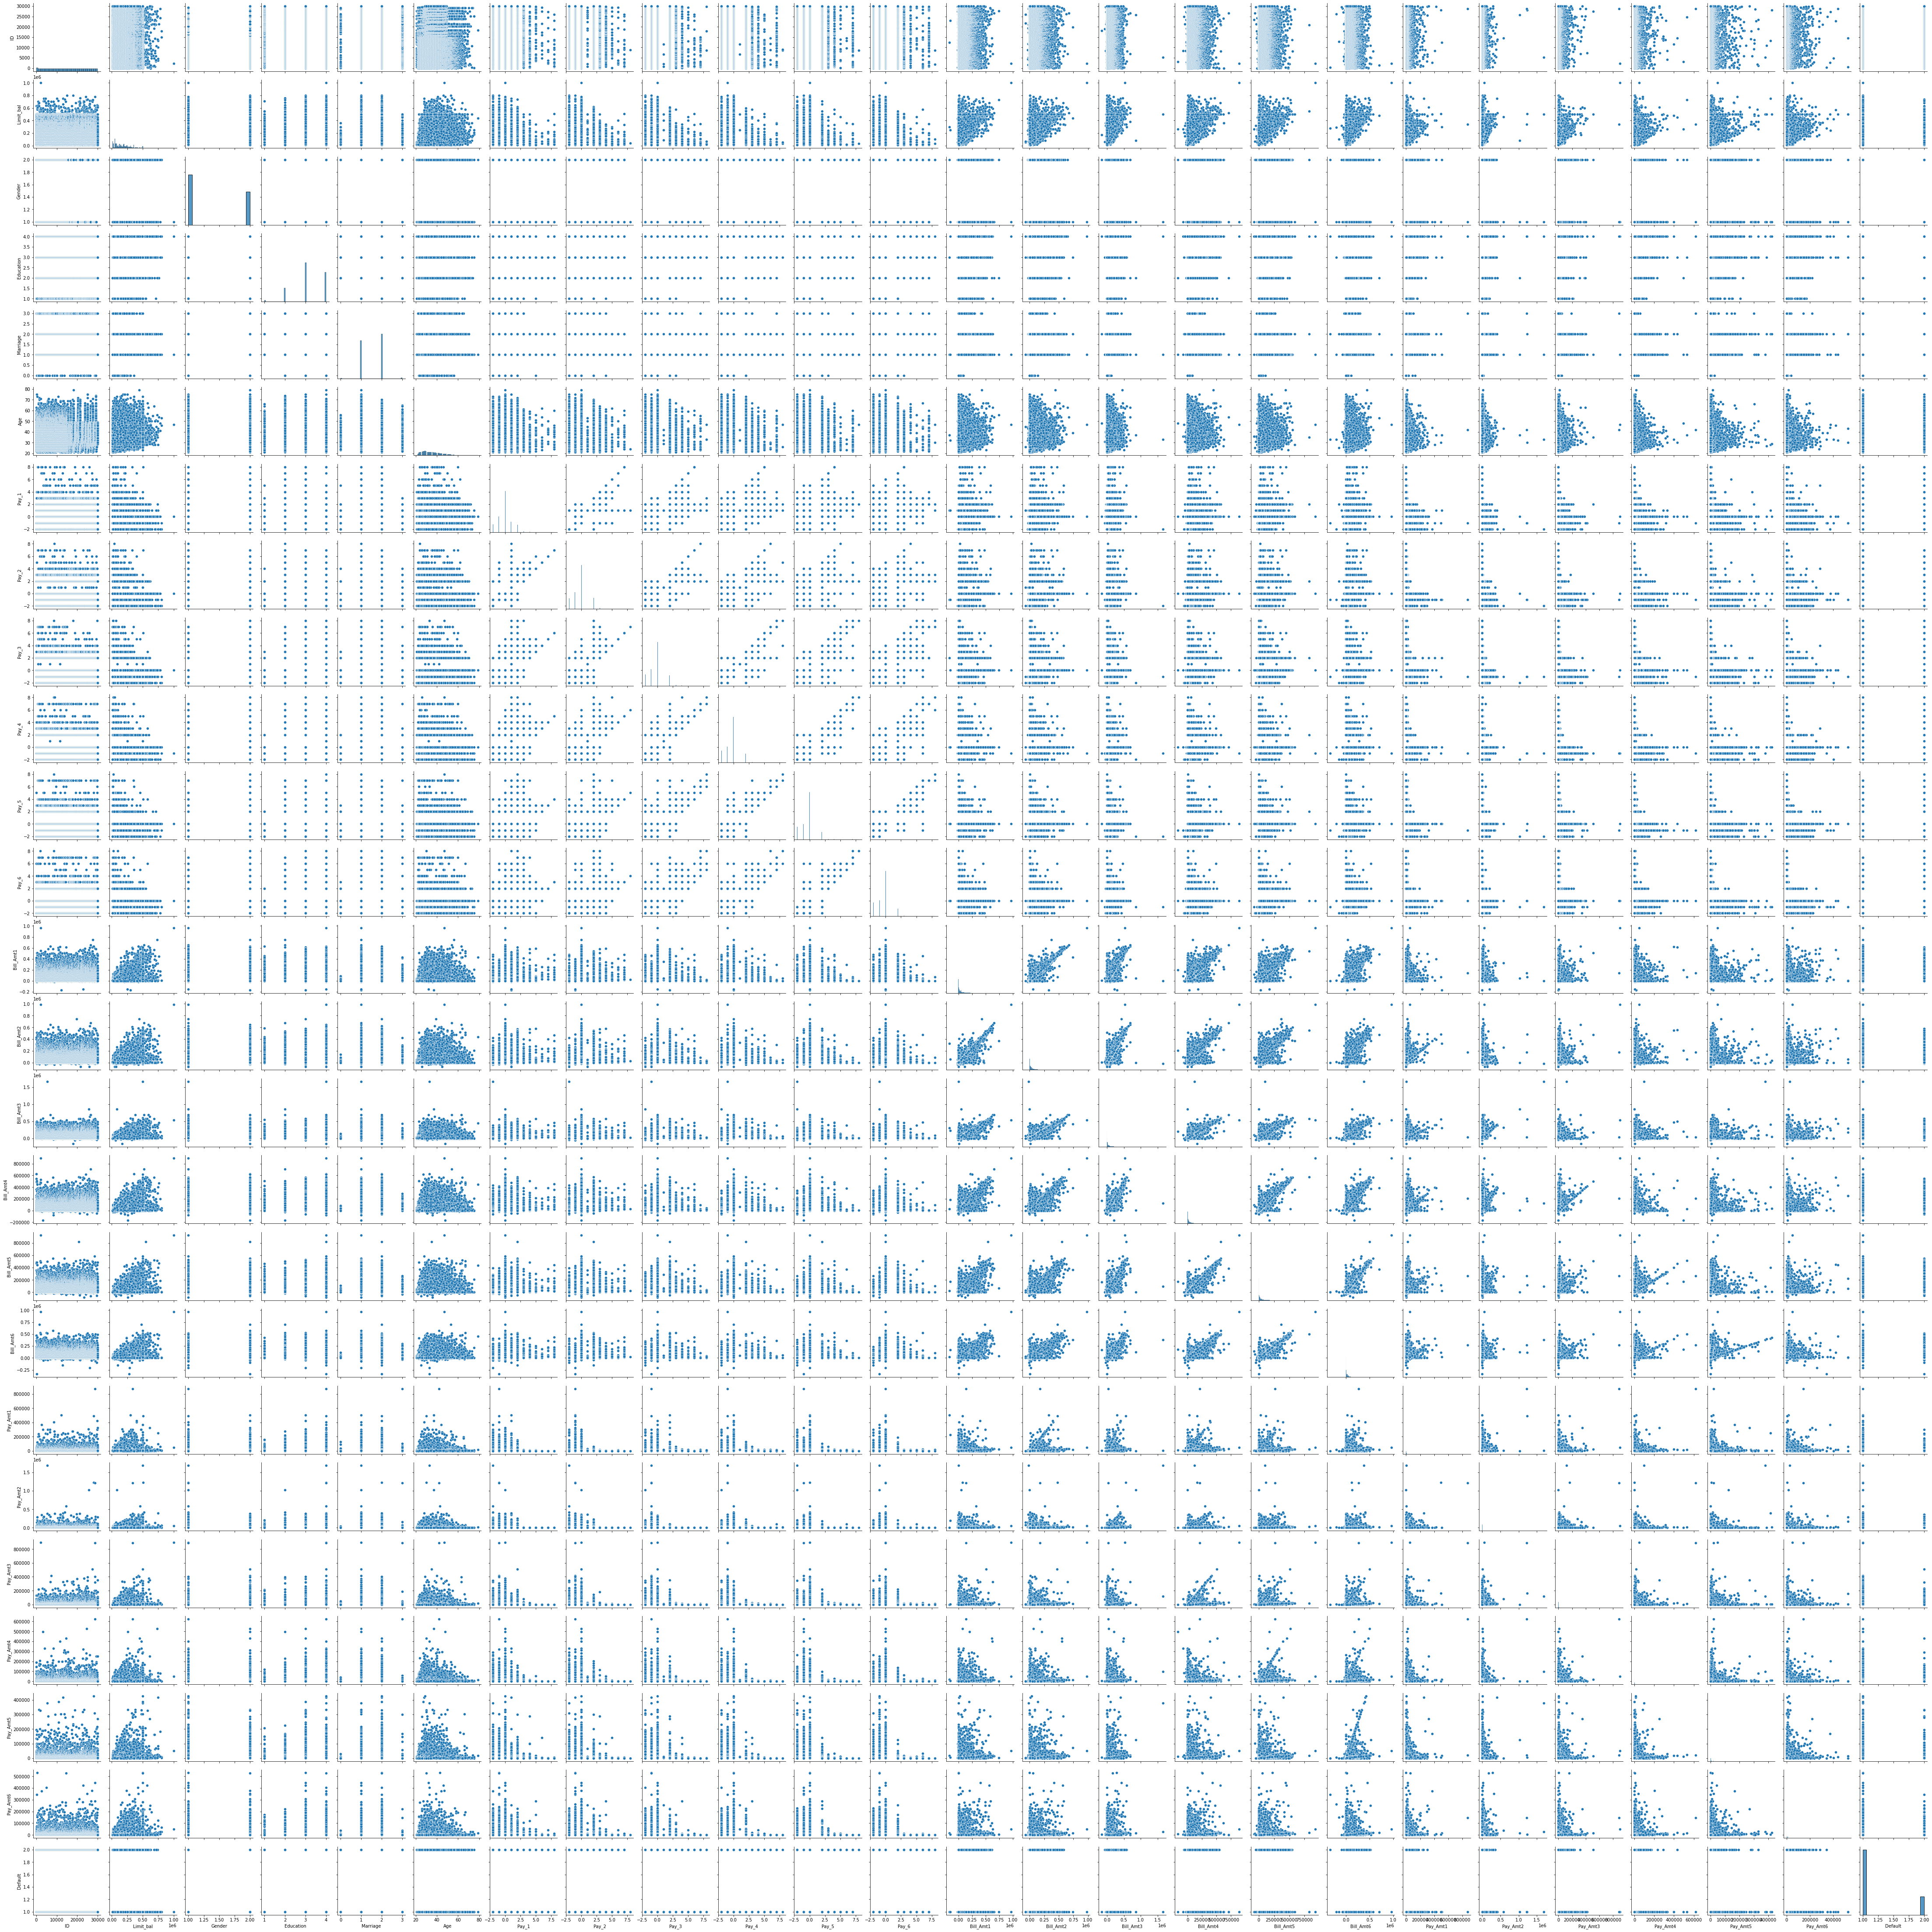

In [16]:
ax = sns.pairplot(data)

In [17]:
data['Default'].describe()

count    30201.000000
mean         1.221251
std          0.415096
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Default, dtype: float64

D:\Users\jryba\anaconda3\envs\DataAnalyticsCourse\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


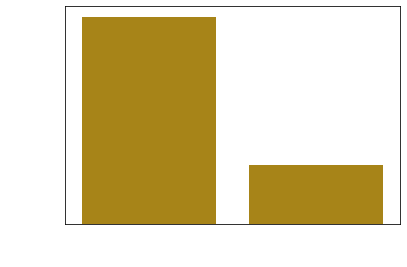

In [63]:
ax=sns.countplot(data['Default'], color='#BF9000')
ax.set_xlabel('Default', fontsize=15, color='w')
ax.set_ylabel('Count', fontsize=15, color='w')
ax.tick_params(axis='x', colors='w') # x-axis
ax.tick_params(axis='y', colors='w') # y-axis
ax.set_xticklabels(['Paid', 'Defaulted'])
plt.savefig('Default_Count.png', bbox_inches='tight', dpi=300, transparent=True)

In [84]:
default_count = data['Default'].value_counts()

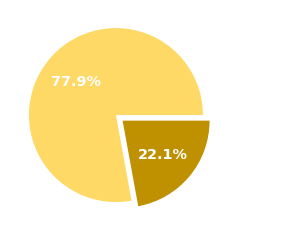

In [126]:
default_count = data['Default'].value_counts()
labels=(['Paid','Defaulted'])

plt.setp(ax, color='white')
ax=plt.pie(x=default_count, colors=['#FFD966','#BF9000'], labels=labels, autopct='%.1f%%', 
           textprops={'color':'white','size':'x-large','fontweight':'bold'}, explode=(0,0.1))
plt.savefig('Default_Perc_Pie.png', bbox_inches='tight', dpi=300, transparent=True)